**<h1><center> PROBLEMA DEL QUIOSQUERO. </center></h1>**

Flores Carmona Jorge Emilio

Un quiosquero vende periódicos a 1.10 euros cada uno. Cada periódico le cuesta al quiosquero 0.90 euros. Las ventas de periódicos del quiosquero a partir de su experiencia se refleja en la tabla siguiente.

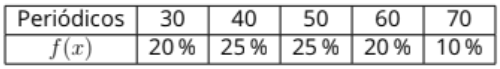

La tabla recoge por ejemplo que el 20 % del tiempo las ventas han sido de 30 periódicos. Teniendo en cuenta el coste de 0,20 euros por venta perdida y el coste de 0,10 euros por el reciclaje de cada periódico no vendido, determine el beneficio promedio diario si pide 50 periódicos cada día.

### Solución por simulación

**1.** Identificamos las variables

$x =$ Numero de periodicos vendidos

$c_v=$1.10 (Costo al que se vende el periodico)

$c_p=$ 0.90 (Costo del periodico al quiosquero)

$c_{vp}=$ 0.20 (Costo por venta perdida)

$c_r=$ 0.10 (Costo por reciclaje de periodico no vendido)

**2.** Determine la distribución de probabilidad

Vemos que la distribución de probabilidad es la expresada en la imagen al inicio


**3.** Modelamos la variable aleatoria con las probabilidades indicadas

Creamos una lista aleatoria de periodicos con los porcentajes indicados haciendo uso de condicionales y la probabilidad acumulativa del problema

**4.** Modelo y objetivos del sistemas de simulación

El objetivo del siguiente sistema es simular la llegada de periodicos en un dia y determinar cual es el beneficio promedio si se piden 50 periodicos al dia.

Sea $x=$Cantidad de periodicos vendidos en un dia, nuestra variable aleatoria y los siguientes valores fijos son costos:

$c_v=$1.10 (Costo al que se vende el periodico)

$c_p=$ 0.90 (Costo del periodico al quiosquero)

$c_{vp}=$ 0.20 (Costo por venta perdida)

$c_r=$ 0.10 (Costo por reciclaje de periodico no vendido)

El valor del beneficio estara dado por la formula

$$B(x)= x(c_v) - x(c_p) + Max(50-x,0)(c_r) - Max(x-50,0)(c_{vp})$$


**Paso 5**. Experimento: 

1.Generamos numeros aleatorios

In [189]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [190]:
def PERIODIAS():
    ventas=0
    u = random.random()
    if 0.0 <= u < 0.20:
        ventas = 30
    elif 0.20 <= u < 0.45:
        ventas = 40
    elif 0.45 <= u < 0.70:
        ventas = 50
    elif 0.70 <= u < 0.90:
        ventas = 60
    elif 0.90 <= u <= 1.00:
        ventas = 70
    return ventas

2. Simulamos el beneficio en un dia

In [250]:
def BEN(k):
  x=PERIODIAS()
  c_v=1.10 
  c_p=0.90
  c_vp= 0.20 
  c_r= 0.10 

  if x>k:
    x=k
    B=x*c_v - k*c_p -(x-k)*c_vp
  elif x<=k:
    B=x*c_v - k*c_p + (k-x)*c_r
    
  return(B)


3. Realizamos el experimento n veces guardando los beneficios de cada dia


In [265]:
def experimento(n,k): #Hacemos el experimento n veces
    i = 0 #iterador que determinara las veces que se repetira el experimento
    c=0 #Contador de casos favorables
    Lista = [] #Lista donde se guardaran las probabilidades del caso solicitado
    while i<=n: #Hasta que el iterador sea igual al numero de veces que se repite el experimento este se llevara acabo
        c+=BEN(k)
        i += 1
        p=c/i #probabilidad acumulativa
        Lista.append(p)
    return Lista 

4. Calculamos la media de beneficio diario

In [266]:
exp=experimento(5000,50)

In [267]:
print("El promedio de beneficio diario comprando 50 periodicos es de ", np.mean(exp))

El promedio de beneficio diario comprando 50 periodicos es de  3.3705346063990804


5. Obtenemos la gráfica de estabilización que indica que el tamaño de muestra utilizado es suficiente para garantizar la convergencia del resultado.

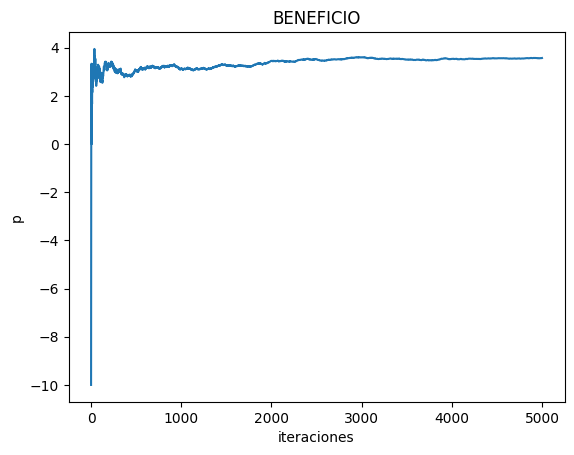

In [268]:
plt.plot(exp)
plt.xlabel('iteraciones')
plt.ylabel('p')
plt.title('BENEFICIO')
plt.show()

**PASO 6**. Replicamos el modelo.

In [269]:
def simulacion_ventas(n):
    List = []
    for i in range(n):
        List.append(np.mean(experimento(5000,50)))
    return List

In [270]:
simulacion = simulacion_ventas(500)

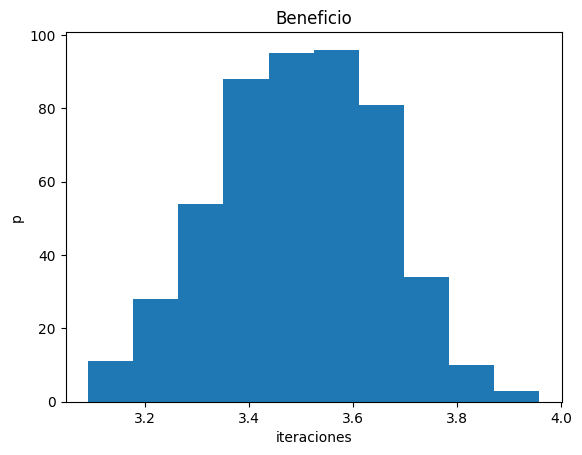

In [284]:
plt.hist(simulacion)
plt.xlabel('iteraciones')
plt.ylabel('p')
plt.title('Beneficio')
plt.show()

**PASO 7**. Calculamos la media de beneficio diario que tendra el quiosquero asi como su desviacion estandar

In [272]:
np.mean(simulacion), np.var(simulacion), np.std(simulacion)

(3.497751843799439, 0.024655243501199634, 0.15701988250282076)

**PASO 8**. Halle el intervalo de confianza de la probabilidad de queaparezcan dos caras lanzando tres veces una moneda 
al aire con un nivel de confianza del $95 \%$.

Calculamos primero el limite superior del intervalo de confianza con una certeza del 95% usando la siguiente formula 

$$L_{s}=\bar{x}+Z_{\frac{\alpha}{2}} \left(\frac{\sigma}{\sqrt{n}} \right)$$

In [273]:
p=np.mean(simulacion)
n=500
ls=p+(1.96*np.std(simulacion)/np.sqrt(n))
print(ls)

3.511515243338376


Calculamos ahora el limite inferior

$$L_{i}=\bar{x}-Z_{\frac{\alpha}{2}} \left(\frac{\sigma}{\sqrt{n}} \right)$$

In [274]:
  p=np.mean(simulacion)
  n=500
  li=p-(1.96*np.std(simulacion)/np.sqrt(n))
  print(li)

3.483988444260502


Por lo tanto los intervalos de confianza son:

$$L_{i} \leq \mu \leq L_{s}$$

In [275]:
print(li,"<=", p,"<=", ls)

3.483988444260502 <= 3.497751843799439 <= 3.511515243338376


Ahora veamos el pedido de periodicos que aumentaria el beneficio del quiosquero

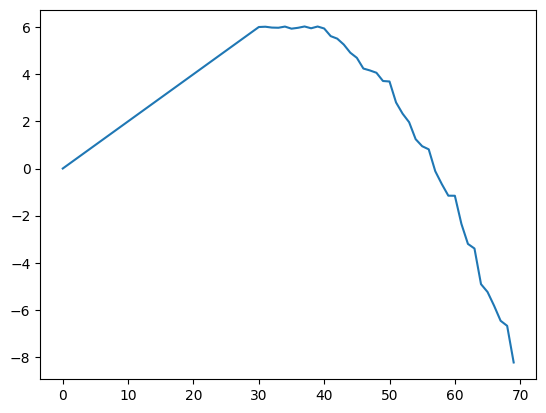

In [278]:
LISTABEN=[]

for i in range(70):
  v=np.mean(experimento(5000,i))
  LISTABEN.append(v)
plt.plot(LISTABEN)


In [281]:
print("El valor maximo que alcanzara de benficio el quiosquero sera de ",max(LISTABEN))


El valor maximo que alcanzara de benficio el quiosquero sera de  6.023097795688178


In [283]:
print("Que se alcanza cuando compra un total de ", LISTABEN.index(max(LISTABEN))-1, "periodicos")

Que se alcanza cuando compra un total de  36 periodicos
